You now have a pretty varied suite of clustering and clustering evaluation methods; we'd be remiss if we didn't give you the opportunity to try them out on some real data. So here we go!

There is a lot of information on runners and their performance for the Boston Marathon. Pick a year (post-2012 has more info) and do some clustering.

Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.



# Questions:

### When clustering by marathon times, will the result lead to groups of  similar ages? genders? countries?

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [2]:
# 2014 data
original = pd.read_csv('D:\\Data\\results.csv')
#original = pd.read_csv('C:\\Users\\mkennedy\\Documents\\GitHub\\Thinkful_Unit_4\\results.csv')

In [23]:
data = original

In [4]:
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [5]:
data.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [6]:
div_data = pd.get_dummies(data.division)
data = pd.concat([data, div_data], axis=1)

In [7]:
gen_data = pd.get_dummies(data.gender)
data = pd.concat([data, gen_data], axis=1)

In [8]:
bib_data = pd.get_dummies(data.bib)
data = pd.concat([data, bib_data], axis=1)

In [9]:
ctz_data = pd.get_dummies(data.ctz)
data = pd.concat([data, ctz_data], axis=1)

In [10]:
state_data = pd.get_dummies(data.state)
data = pd.concat([data, state_data], axis=1)

In [11]:
country_data = pd.get_dummies(data.country)
data = pd.concat([data, country_data], axis=1)

In [12]:
city_data = pd.get_dummies(data.city)
data = pd.concat([data, city_data], axis=1)

In [24]:
data.half.astype(float, errors='ignore')

0         39.72
1         69.47
2         38.03
3         69.47
4         38.60
5         69.47
6         39.72
7         64.85
8         38.60
9         65.23
10        69.47
11        64.87
12        41.18
13        71.10
14        40.20
15        71.68
16        39.12
17        69.47
18        41.20
19        73.95
20        64.90
21        70.25
22        64.88
23        41.20
24        41.80
25        71.45
26        64.88
27        41.82
28        70.27
29        64.90
          ...  
31954    118.22
31955    147.12
31956    119.05
31957    118.47
31958    160.02
31959    146.87
31960    131.37
31961    162.62
31962    163.02
31963    104.17
31964    122.37
31965    155.13
31966    159.45
31967    123.83
31968    172.48
31969    140.83
31970    124.03
31971    157.35
31972    154.50
31973    153.02
31974    183.28
31975    170.82
31976    135.50
31977    136.98
31978    173.45
31979    104.78
31980    135.85
31981    130.57
31982    137.03
31983    114.13
Name: half, Length: 3198

In [25]:
data.official.astype(float)

0         85.25
1        138.95
2         80.60
3        140.58
4         81.23
5        140.68
6         84.65
7        129.83
8         81.23
9        137.83
10       143.00
11       128.80
12        86.95
13       152.07
14        87.40
15       143.90
16        84.70
17       139.98
18        84.88
19       150.48
20       128.83
21       141.48
22       137.20
23        86.95
24        89.40
25       147.67
26       132.72
27        89.52
28       143.37
29       132.57
          ...  
31954    250.65
31955    293.53
31956    279.85
31957    254.08
31958    364.88
31959    313.63
31960    294.28
31961    370.85
31962    370.83
31963    248.93
31964    260.03
31965    336.80
31966    371.38
31967    262.35
31968    364.60
31969    340.62
31970    278.13
31971    342.77
31972    331.83
31973    356.20
31974    431.73
31975    385.13
31976    288.85
31977    302.93
31978    374.22
31979    211.75
31980    302.52
31981    282.00
31982    302.73
31983    228.30
Name: official, Length: 

In [27]:
data = data[data.half != '-']

In [91]:
X = data[['official', 'half']]
X = normalize(X, axis =0)
y = data['gender']

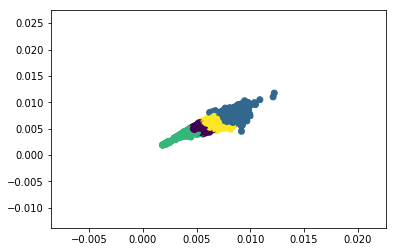

Comparing k-means clusters against the data:
gender     F     M
row_0             
0       6721  5231
1       1911  1522
2       1656  7287
3       3912  3477


In [102]:
# Using k-means

# Calculate predicted values.
# After experimenting with different n_clusters, 4 yields best results
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X)

# Plot the solution.
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [103]:
# Will adding more features improve the clustering?
# Adding age
X = data[['official', 'half', 'age']]
X = normalize(X, axis =0)
y = data['gender']

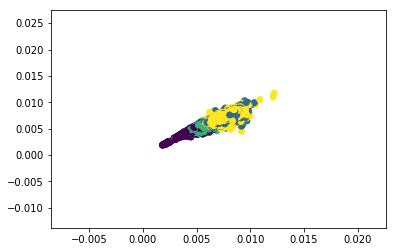

Comparing k-means clusters against the data:
gender     F     M
row_0             
0       4304  4903
1       2031  3101
2       4483  7310
3       3382  2203


In [104]:
# Using k-means

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X)

# Plot the solution.
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [105]:
# Adding age made the clustering worse.
# Try adding division and dropping age.

X = data[['official', 'half', 'division']]
X = normalize(X, axis =0)
y = data['gender']

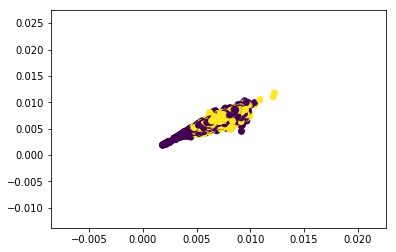

Comparing k-means clusters against the data:
gender      F      M
row_0               
0       10278  14552
1        3922   2965


In [106]:
# Using k-means

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X)

# Plot the solution.
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [107]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


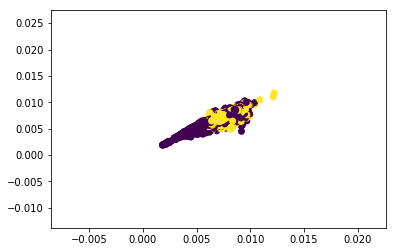

Comparing the assigned categories to the ones in the data:
col_0       0     1
gender             
F       11897  2303
M       16228  1289


In [108]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y,labels))

In [109]:
# Meanshift only produced one cluster.

data = data[data['40k'] != '-']

X = data[['official', 'half', '40k']]
X = normalize(X, axis =0)
y = data['gender']

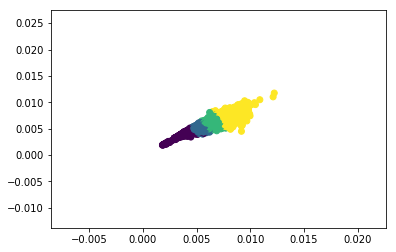

Comparing k-means clusters against the data:
gender     F     M
row_0             
0       1806  7317
1       6687  5241
2       3819  3405
3       1888  1554


In [110]:
# Using k-means

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X)

# Plot the solution.
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [111]:
data = data[data['25k'] != '-']

# Turn country into values, by first making it into a list, then applying .index(l)
countries = data.country.tolist()
indexes=[countries.index(l) for l in countries]
data['countries'] = indexes

X = data[['official', 'half', '40k', '25k']]
X = normalize(X, axis =0)
y = data['gender']
y_cntry = data['countries']

NameError: name 'axis' is not defined

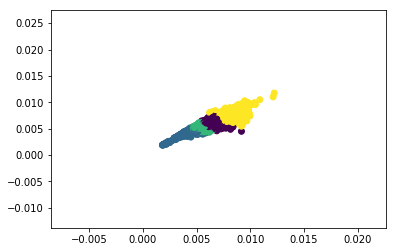

In [116]:
# Using k-means

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X)

# Plot the solution.
figure,axis = plt.scatter(X[:, 0], X[:, 1], c=y_pred)
axis.legend()
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

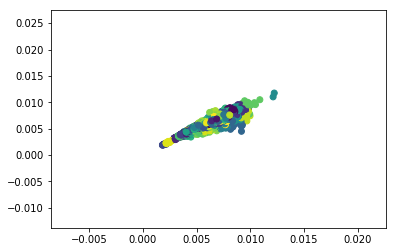

Comparing k-means clusters against the data:
col_0       0    1    2    3    4    5    6    7    8   9  ...    68   69  70  \
countries                                                  ...                  
0            4    4    0    2    1    1    3    6    3   2 ...     0    1   0   
1            0    0    0    0    0    0    0    0    1   9 ...     0    0   0   
2            1    0    0    1    1    2    0    0    3   1 ...     0    0   0   
3            0    0    0    0    0    0    0    0    0   5 ...     0    0   0   
6            0    3    0    0    0    1    0    5    1   0 ...     0    0   0   
9          508  786  149  621  386  543  165  621  433  27 ...   426  213  14   
12           2    5    0    5    2    2    0    3    0   0 ...     0    0   0   
14          37   70    1   57    8   58    6   44   23   1 ...    43    4   3   
16           0    4    0    1    0    2    0    3    0   0 ...     1    0   0   
18           0    0    0    0    0    1    0    1    1   0 ...  

In [88]:
# Using k-means

# Calculate predicted values.
y_pred = KMeans(n_clusters=78, random_state=42).fit_predict(X)

# Plot the solution.
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_cntry, y_pred))

In [89]:
# Clustering on countries did not produce results that were readable. 

# Analysis:

### From the results in this notebook, adding the 40k and 25k times improved the ability for k-means to cluster based on gender. 